# Question: 1

Imagine you have a dataset where you have different Instagram features like __username , Caption , Hashtag , Followers , Time_Since_posted , and likes ,__ now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 

__Dataset This is the Dataset You can use this dataset for this question.__ 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r"instagram_reach.csv")

In [5]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [7]:
data.isnull().sum() # data is null 

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [8]:
data.duplicated().sum() # check the duplicate values


0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [10]:
data.shape

(100, 8)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,8.94,6.639064,0.0,4.00,8.0,12.25,26.0
S.No,100.0,16.24,7.384286,1.0,10.75,16.5,22.25,30.0
Followers,100.0,961.96,1014.625670,11.0,252.75,612.0,1197.00,4496.0
Likes,100.0,46.48,55.086980,8.0,19.00,29.0,46.00,349.0


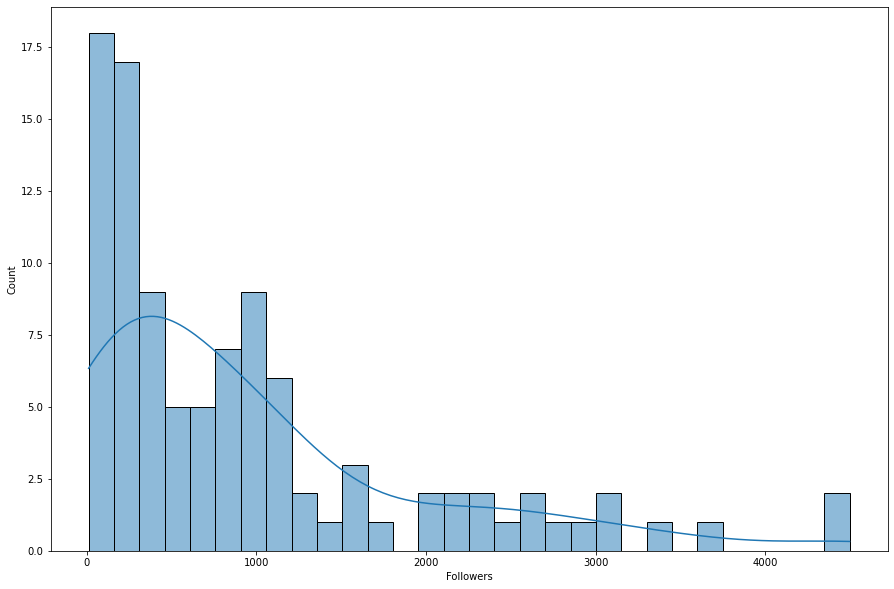

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(data=data, x='Followers', bins=30, kde=True)
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['USERNAME']=le.fit_transform(data['USERNAME'])
data['Caption']=le.fit_transform(data['Caption'])
data['Hashtags']=le.fit_transform(data['Hashtags'])

In [14]:
data['Time since posted'] = data['Time since posted'].str.extract('(\d+)').astype(int)

In [15]:
data

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,64,86,1600,17,11,139
1,1,2,29,82,880,97,2,23
2,2,3,3,13,255,87,2,25
3,3,4,71,89,340,65,3,49
4,4,5,23,30,304,64,3,30
...,...,...,...,...,...,...,...,...
95,8,19,63,6,614,29,3,31
96,9,21,30,24,450,88,3,42
97,10,22,31,83,182,36,3,10
98,11,24,55,85,2039,62,3,222


In [16]:
# here we drop the colums for target 
X=data.drop(labels=['S.No','Time since posted','Likes'],axis=1)

In [17]:
X

,Unnamed: 0,USERNAME,Caption,Followers,Hashtags
0,0,64,86,1600,17
1,1,29,82,880,97
2,2,3,13,255,87
3,3,71,89,340,65
4,4,23,30,304,64
...,...,...,...,...,...
95,8,63,6,614,29
96,9,30,24,450,88
97,10,31,83,182,36
98,11,55,85,2039,62


In [18]:
print(data.columns)

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')


In [19]:
y = data[['Time since posted','Likes']]

In [20]:
y

,Time since posted,Likes
0,11,139
1,2,23
2,2,25
3,3,49
4,3,30
...,...,...
95,3,31
96,3,42
97,3,10
98,3,222


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [22]:
X_train

,Unnamed: 0,USERNAME,Caption,Followers,Hashtags
68,6,82,56,371,9
25,25,77,52,1211,48
52,13,71,94,348,10
84,11,74,75,361,73
11,11,32,73,2232,21
...,...,...,...,...,...
91,4,85,53,971,46
64,2,5,28,89,69
47,8,0,0,3139,89
0,0,64,86,1600,17


In [23]:
y_train

,Time since posted,Likes
68,2,19
25,2,46
52,4,17
84,3,33
11,8,48
...,...,...
91,2,46
64,2,19
47,3,51
0,11,139


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X_train_scaled=scaler.fit_transform(X_train)

In [26]:
X_test_scaled=scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [28]:
def evaluate_model(true, predict):
    r2=r2_score(true, predict)
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
   

    return r2, mae,mse,

In [29]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor()

}

In [30]:
for i in range(len(models)):
    model=list((models.values()))[i]
    print(model)
    
    
r2_list=[]

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()


In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [34]:
for i in range(len(models)):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    R2,MAE,MSE=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)
    
    r2_list.append(R2)

    print("="*40)
    print("\n")


model training performance LinearRegression()
MSE: 649.4729953727687
MAE: 14.992866654313696
R2 SCORE: -0.7790284844110049


model training performance Lasso()
MSE: 647.1641499568971
MAE: 14.928532617200675
R2 SCORE: -0.6474499039511628


model training performance Ridge()
MSE: 649.4601763340568
MAE: 14.9926665949618
R2 SCORE: -0.7788941675251478


model training performance ElasticNet()
MSE: 647.8525338297275
MAE: 14.950902503713037
R2 SCORE: -0.708231370158689


model training performance RandomForestRegressor()
MSE: 1197.715958
MAE: 19.236600000000003
R2 SCORE: -5.013699289595009




In [33]:
r2_list

[-0.7790284844110049,
 -0.6474499039511628,
 -0.7788941675251478,
 -0.708231370158689,
 -5.591012038356677]

the best model R2 square is -0.7790284844110049   __LinearRegression__